<a href="https://colab.research.google.com/github/E008001/Simple-Image-Classification-Model/blob/master/Copy_of_130deseasplanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Connect Google Drive to Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#Change dir
import os
os.chdir('/content/drive/My Drive/torch-20/')
!ls

 130deseasplanet.ipynb	'Copy of 130deseasplanet.ipynb'   torch-test.ipynb
 Book130.csv		 test20-torch-test.ipynb	  train-set
 Book20.csv		 Torch-test			  Untitled0.ipynb


In [12]:
# importing the libraries
import pandas as pd
import numpy as np
import torch
# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [13]:
#Other
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [14]:
# loading dataset
train=pd.read_csv('Book130.csv')
train.head()

,Image_Name,Lable
0,H(0),0
1,H(1),0
2,H(2),0
3,H(3),0
4,H(4),0


In [15]:
train.shape

(102, 2)

In [16]:
uniqueValues = train['Lable'].unique()
print(uniqueValues)

[0 1]


In [17]:
for i in range (5):
     print(train['Image_Name'].iloc[i])

H(0)
H(1)
H(2)
H(3)
H(4)


In [18]:
# CPU or GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [19]:
#Change dir
import os
os.chdir('/content/drive/My Drive/torch-20/train-set/')
!ls

'H(0).JPG'	      'H(1345).JPG'  'H(1367).JPG'  'H(20).JPG'  'H(40).JPG'
'H(10).JPG'	      'H(1346).JPG'  'H(1368).JPG'  'H(21).JPG'  'H(41).JPG'
'H(11).JPG'	      'H(1347).JPG'  'H(1369).JPG'  'H(22).JPG'  'H(42).JPG'
'H(12).JPG'	      'H(1348).JPG'  'H(1370).JPG'  'H(23).JPG'  'H(43).JPG'
'H(1330).JPG'	      'H(1349).JPG'  'H(1371).JPG'  'H(24).JPG'  'H(44).JPG'
'H(1331).JPG'	      'H(1350).JPG'  'H(1372).JPG'  'H(25).JPG'  'H(45).JPG'
'H(1332).JPG'	      'H(1351).JPG'  'H(1373).JPG'  'H(26).JPG'  'H(46).JPG'
'H(1333).JPG'	      'H(1352).JPG'  'H(1374).JPG'  'H(27).JPG'  'H(47).JPG'
'H(1334).JPG'	      'H(1353).JPG'  'H(1375).JPG'  'H(28).JPG'  'H(48).JPG'
'H(1335).JPG'	      'H(1354).JPG'  'H(1376).JPG'  'H(29).JPG'  'H(49).JPG'
'H(1336).JPG'	      'H(1355).JPG'  'H(1377).JPG'  'H(2).JPG'	 'H(4).JPG'
'H(1337).JPG'	      'H(1356).JPG'  'H(1378).JPG'  'H(30).JPG'  'H(50).JPG'
'H(1338).JPG'	      'H(1357).JPG'  'H(1379).JPG'  'H(31).JPG'  'H(5).JPG'
'H(1339).JPG'	      'H(1358).JPG'  'H

In [20]:
from skimage.transform import resize

In [21]:
train_img = []
for img_name in tqdm(train['Image_Name']):
    # defining the image path
    image_path =  str(img_name) + '.JPG'
    
    # reading the image
    img = imread(image_path, as_gray=True )
    img = resize(img, (img.shape[0] // 9, img.shape[1] // 9),anti_aliasing=True)
                      
    # normalizing the pixel values
    img /= 255.0
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    train_img.append(img)

100%|██████████| 102/102 [00:26<00:00,  3.80it/s]


In [22]:
# converting the list to numpy array
train_x = np.array(train_img)
# defining the target
train_y = train['Lable'].values
train_x.shape

(102, 28, 28)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f60a28beef0>,
 <matplotlib.image.AxesImage at 0x7f609fff5668>)

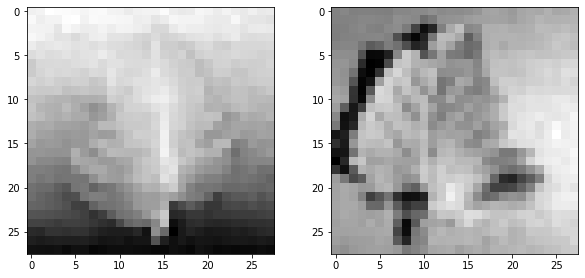

In [23]:
# visualizing images
i = 0
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(train_x[i], cmap='gray')
plt.subplot(222), plt.imshow(train_x[i+25], cmap='gray')
#plt.subplot(223), plt.imshow(train_x[i+50], cmap='gray')
#plt.subplot(224), plt.imshow(train_x[i+75], cmap='gray')


In [24]:
# create validation set
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.2)
(train_x.shape, train_y.shape), (val_x.shape, val_y.shape)

(((81, 28, 28), (81,)), ((21, 28, 28), (21,)))

In [25]:
# converting training images into torch format
train_x = train_x.reshape(81, 1, 28, 28)
train_x  = torch.from_numpy(train_x)

# converting the target into torch format
train_y = train_y.astype(int);
train_y = torch.from_numpy(train_y)

# shape of training data
train_x.shape, train_y.shape

(torch.Size([81, 1, 28, 28]), torch.Size([81]))

In [26]:
# converting validation images into torch format
val_x=val_x.reshape(21, 1, 28, 28)
val_x=torch.from_numpy(val_x)


# converting the target into torch format
val_y=val_y.astype(int);
val_y=torch.from_numpy(val_y)


# shape of validation data
val_x.shape, val_y.shape

(torch.Size([21, 1, 28, 28]), torch.Size([21]))

In [27]:
#Define Secand Model CNN2
class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
        self.fc1 = nn.Linear(4 * 7 * 7, 20) # size of pervious layer is 14*14=196
        self.fc2 = nn.Linear(20, 10)
        self.fc3 = nn.Linear(10, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 4 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = CNN1()

In [28]:
#define first model as CNN1
class CNN2(Module):   
    def __init__(self):
        super(CNN2, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = Sequential(
            Linear(4 * 7 * 7, 2)
            
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

net = CNN2()

In [29]:

class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5,stride=1, padding=2)
        self.fc1 = nn.Linear(14*14, 120) # the input size is 14*14 after max-pool2d
        #self.fc2 = nn.Linear(120, 84)
        #self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 7 * 7)
        #x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = self.fc3(x)
        return x


net = CNN3()


In [30]:
class CNN4(nn.Module):
    def __init__(self):
        super(CNN4, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5 )   #,  padding = 2) # padding is zero
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3)   # , padding = 1) # padding is zero
        self.fc1 = nn.Linear(5 * 5 * 16, 100)    #28-5+1=24 /2=12/2 =6
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 5 * 5 *16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = CNN4()

In [31]:
class CNN41(nn.Module):
    def __init__(self):
        super(CNN41, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5 )   #, padding = 2) # padding is zero
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3 , padding=1)
        self.fc1 = nn.Linear(6 * 6 * 16, 100)    #28-5+1=24 /2=12/2 =6
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 6 * 6 *16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = CNN41()

In [32]:
class CNN42(nn.Module):
    def __init__(self):
        super(CNN42, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5    , padding = 2 )
        self.pool = nn.MaxPool2d(2, 2) 
        self.conv2 = nn.Conv2d(6, 16, 3   , padding = 1 )
        self.fc1 = nn.Linear(7 * 7 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 7 * 7 *16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = CNN42()

In [33]:
#Define 3th model as CNN5
class CNN5(nn.Module):
  def __init__(self):

    super(CNN5, self).__init__()
    #self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size=3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size=3, stride=1, padding=1)
    self.fc1 = nn.Linear(in_features = 32 * 7 * 7, out_features = 150)
    self.fc2 = nn.Linear(in_features = 150,out_features =  90)
    self.fc3 = nn.Linear(in_features = 90,out_features = 2)

  def forward(self, x):

    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2 )
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):

    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s
    return num_features 

In [34]:
class CNN6(nn.Module):
    def __init__(self):
        super(CNN6, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 64, 100)
        #self.fc1 = nn.Linear(3136 , 100) # note that we need 3136 node for this fully connected layer
        self.fc2 = nn.Linear(100, 2)
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [35]:
class CNN7(nn.Module):
    def __init__(self):
        super(CNN7, self).__init__()
        
        # Declare all the layers for feature extraction
        self.features = nn.Sequential(nn.Conv2d(in_channels=1,
                                                out_channels=5,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1), 
                                      nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=5,
                                                out_channels=10,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1), 
                                      nn.MaxPool2d(2, 2),
                                      nn.ReLU(inplace=True),
                                      nn.BatchNorm2d(10),
                                      nn.Conv2d(in_channels=10,
                                                out_channels=20,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1),
                                      nn.ReLU(inplace=True),
                                      nn.BatchNorm2d(20),
                                      nn.Conv2d(in_channels=20,
                                                out_channels=40,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1),
                                      nn.MaxPool2d(2, 2),
                                      nn.ReLU(inplace=True),
                                      nn.BatchNorm2d(40))
        
        # Declare all the layers for classification
        self.classifier = nn.Sequential(
            nn.Linear(7 * 7 * 40, 200),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(200, 500),
            nn.ReLU(inplace=True),
            nn.Linear(500, 2))
        
    def forward(self, x):
      
        # Apply the feature extractor in the input
        x = self.features(x)
        
        # Squeeze the three spatial dimensions in one
        x = x.view(-1, 7 * 7 * 40)
        
        # Classify the images
        x = self.classifier(x)
        return x

In [36]:
# Convolutional neural network (two convolutional layers)
class CNN8(nn.Module):
    def __init__(self, num_classes=2):
        super(CNN8, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

In [37]:
class CNN9(nn.Module):
    def __init__(self):
        super(CNN9, self).__init__()
        # convolutional layers
        self.conv1 = nn.Conv2d(1, 8, 3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, 3, padding =1)
        # linear layers
        self.fc1 = nn.Linear(28*28, 256) # input size of pervious layer is 28*28
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 2) 
        # dropout
        self.dropout = nn.Dropout(p=0.2)
        # max pooling
        self.pool = nn.MaxPool2d(2, 2)
    
    def forward(self, x):
        # convolutional layers with ReLU and pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flattening the image
        x = x.view(-1, 7*7*16)
        # linear layers
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.fc4(x)
        return x

In [41]:
import torch
from torchvision import models
from torchsummary import summary
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vgg = models.vgg16().to(device)
summary(vgg, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [42]:
# defining the model
model = CNN4()
# defining the optimizer
optimizer = Adam(model.parameters(), lr=0.07)
# defining the loss function
criterion = CrossEntropyLoss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
print(model)

CNN4(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)


In [43]:
def train(epoch):
    model.train()
    tr_loss = 0
    # getting the training set
    x_train, y_train = Variable(train_x), Variable(train_y)
    # getting the validation set
    x_val, y_val = Variable(val_x), Variable(val_y)
    # converting the data into GPU format
    if torch.cuda.is_available():
        x_train = x_train.cuda()
        y_train = y_train.cuda()
        x_val = x_val.cuda()
        y_val = y_val.cuda()

    # clearing the Gradients of the model parameters
    optimizer.zero_grad()
    
    # prediction for training and validation set
    output_train = model(x_train)
    output_val = model(x_val)

    # computing the training and validation loss
    loss_train = criterion(output_train, y_train)
    loss_val = criterion(output_val, y_val)
    train_losses.append(loss_train)
    val_losses.append(loss_val)

    # computing the updated weights of all the model parameters
    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
    if epoch%2 == 0:
        # printing the validation loss
        print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)

In [44]:
# defining the number of epochs
n_epochs = 30
# empty list to store training losses
train_losses = []
# empty list to store validation losses
val_losses = []
# training the model
for epoch in range(n_epochs):
    train(epoch)

Epoch :  1 	 loss : tensor(0.6925, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  3 	 loss : tensor(0.6936, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  5 	 loss : tensor(0.6921, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  7 	 loss : tensor(0.6943, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  9 	 loss : tensor(0.6973, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  11 	 loss : tensor(0.6920, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  13 	 loss : tensor(0.6926, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  15 	 loss : tensor(0.6968, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  17 	 loss : tensor(0.6945, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  19 	 loss : tensor(0.6924, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  21 	 loss : tensor(0.6931, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  23 	 loss : tensor(0.6959, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  25 	 loss : tensor(0.6942, device='c

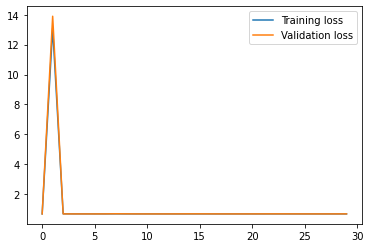

In [45]:
# plotting the training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

In [46]:
# prediction for training set
with torch.no_grad():
    output = model(train_x.cuda())
    
softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on training set
accuracy_score(train_y, predictions)

0.5061728395061729

In [47]:
# prediction for validation set
with torch.no_grad():
    output = model(val_x.cuda())

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on validation set
accuracy_score(val_y, predictions)

0.47619047619047616

In [48]:
# converting training images into torch format
test_x = test_x.reshape(10000, 1, 28, 28)
test_x  = torch.from_numpy(test_x)
test_x.shape

NameError: ignored

In [ ]:
# generating predictions for test set
with torch.no_grad():
    output = model(test_x.cuda())

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

In [ ]:
# replacing the label with prediction
sample_submission['label'] = predictions
sample_submission.head()

In [ ]:
# saving the file
sample_submission.to_csv('submission.csv', index=False)